<a href="https://colab.research.google.com/github/caritapelandra/awesome-github-profile-readme/blob/master/Estudo_Startups_Unic%C3%B3rnio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importar as libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [10]:
#Ler os dados

Base_Dados = pd.read_csv('Startups in 2021 end.csv')

#verificar a dimensão
Base_Dados.shape

(936, 8)

In [5]:
#Primeiros registros
Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [11]:
Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [12]:
#Renomeando colunas
Base_Dados.rename(columns={
  'Unnamed: 0' : 'Id',
  'Company' : 'Empresa', 
  'Valuation ($B)': 'Valor($)', 
  'Date Joined': 'Data de Adesão', 
  'Country': 'País',
  'City': 'Cidade', 
  'Industry': 'Setor', 
  'Select Investors': 'Investidores',
}, inplace=True)


In [13]:
# Verificar tipo da informação
Base_Dados.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor($)        936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [14]:
Base_Dados.isnull().sum()

Id                 0
Empresa            0
Valor($)           0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

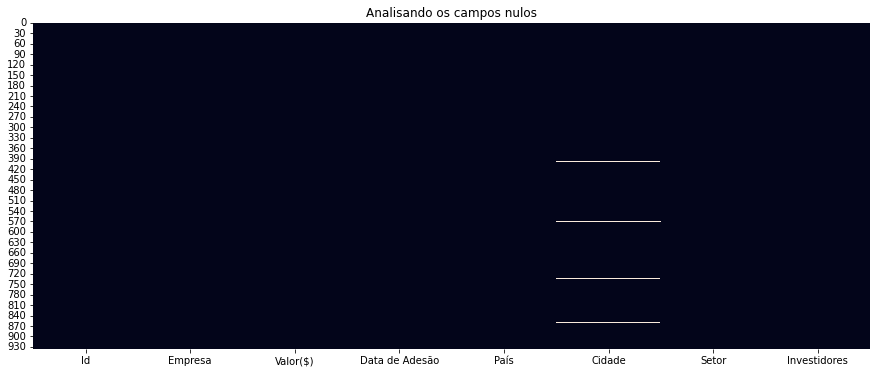

In [15]:
# Visão Gráfica
plt.figure(figsize=(15,6))
plt.title('Analisando os campos nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False);

In [16]:
#Campos únicos
Base_Dados.nunique()

Id                936
Empresa           935
Valor($)          192
Data de Adesão    589
País               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [17]:
#Valores únicos
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [18]:
#Valores únicos- rank
Base_Dados['Setor'].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

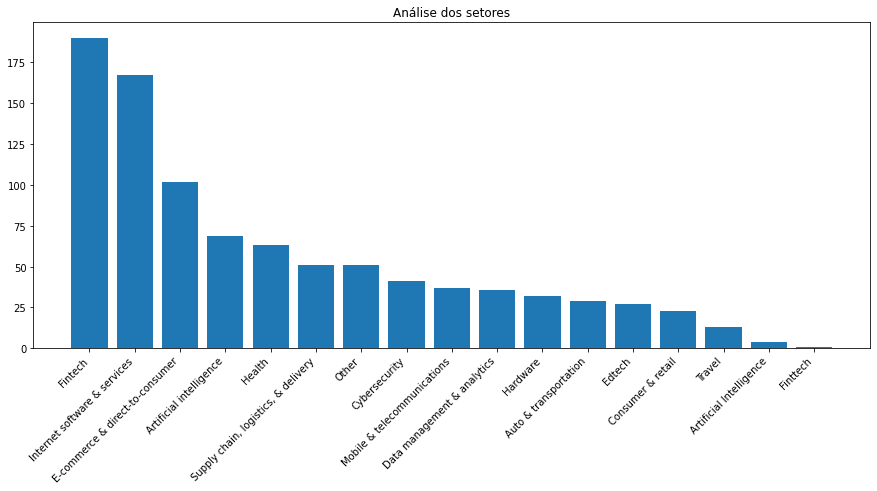

In [19]:
plt.figure(figsize=(15,6))
plt.title('Análise dos setores')
plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts() )
plt.xticks( rotation=45, ha='right');

In [20]:
Analise = round(Base_Dados['País'].value_counts( normalize=True ) *100, 1)

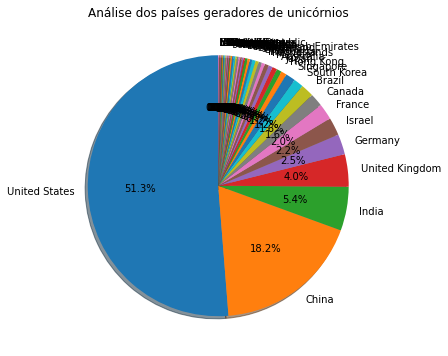

In [51]:
#Plot geral dos países
plt.figure(figsize=(15,6))
plt.title('Análise dos países geradores de unicórnios')
plt.pie(
    Analise,
    labels= Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'

);

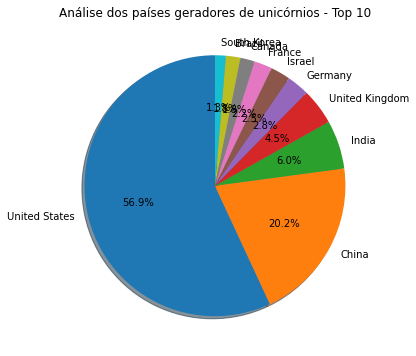

In [21]:

plt.figure(figsize=(15,6))
plt.title('Análise dos países geradores de unicórnios - Top 10')
plt.pie(
    Analise.head(10),
    labels= Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'

);

In [22]:
Analise.head(10)

United States     51.0
China             18.1
India              5.4
United Kingdom     4.0
Germany            2.5
Israel             2.2
France             2.0
Canada             1.6
Brazil             1.6
South Korea        1.2
Name: País, dtype: float64

In [23]:
#Converter Data para tipo: Data
Base_Dados['Data de Adesão']=pd.to_datetime(Base_Dados['Data de Adesão'])

Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [24]:
#Extrair Ano e Mês
Base_Dados['Mes']=pd.DatetimeIndex(Base_Dados['Data de Adesão'] ).month
Base_Dados['Ano']=pd.DatetimeIndex(Base_Dados['Data de Adesão'] ).year

Base_Dados.head()

,Id,Empresa,Valor($),Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [25]:
# Tabela Analítica
Analise_Agrupada = Base_Dados.groupby( by=['País', 'Ano', 'Mes', 'Empresa'] ).count()['Id'].reset_index()

Analise_Agrupada

,País,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [26]:
Analise_Agrupada.loc[
    Analise_Agrupada['País']=='Brazil'             
]

,País,Ano,Mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [29]:
# Transformando a coluna valor
Base_Dados['Valor($)']= pd.to_numeric(Base_Dados['Valor($)'].apply( lambda Linha: Linha.replace('$', '') ))

Base_Dados.head()

,Id,Empresa,Valor($),Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [35]:
# Tabela Analítica
Analise_Pais = Base_Dados.groupby( by=['País'] ).sum()['Valor($)'].reset_index()

Analise_Pais.head()


,País,Valor($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [41]:
Analise_Valor = (Analise_Pais.sort_values('Valor($)', ascending=False ))
Analise_Valor.head()

,País,Valor($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


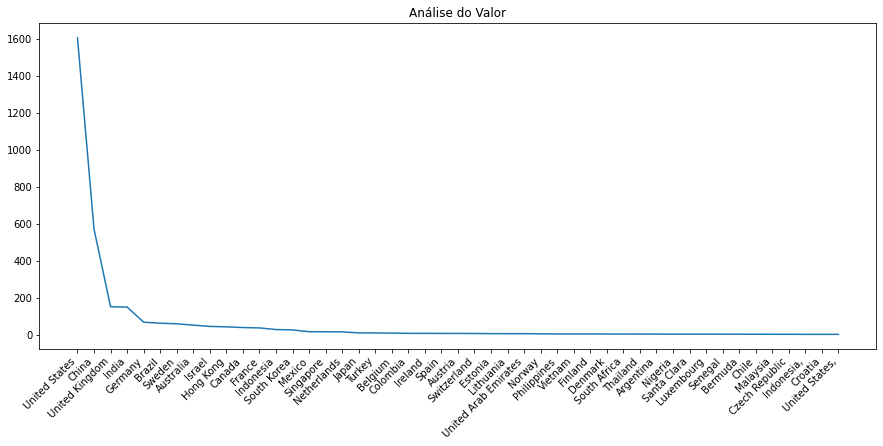

In [47]:
plt.figure(figsize=(15,6))
plt.plot(Analise_Valor['País'], Analise_Valor['Valor($)'])
plt.title('Análise do Valor')
plt.xticks(rotation=45, ha='right');